### KNN算法的距离度量

#### 1.欧氏距离

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
coords1 = [1, 2, 3]
coords2 = [4, 5, 6]
np_c1 = np.array(coords1)
np_c2 = np.array(coords2)
d = np.sqrt(np.sum((np.array(coords1) - np.array((coords2))) ** 2))
print(d)

5.196152422706632


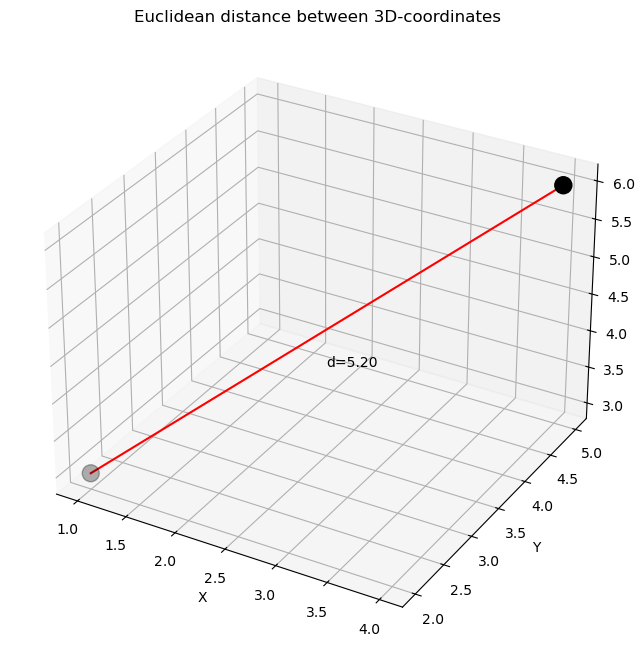

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter((coords1[0], coords2[0]),
           (coords1[1], coords2[1]),
           (coords1[2], coords2[2]),
           color="k", s=150)
ax.plot((coords1[0], coords2[0]),
        (coords1[1], coords2[1]),
        (coords1[2], coords2[2]),
        color="r")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.text(x=2.5, y=3.5, z=4.0, s='d={:.2f}'.format(float(d)))
plt.title('Euclidean distance between 3D-coordinates')
plt.show()

#### 2.曼哈顿距离

In [1]:
x = [1, 2, 3]
y = [4, 5, 6]
print(sum(map(lambda i, j:abs(i-j), x, y)))

9


#### 3.闵可夫斯基距离和切比雪夫距离

#### 4.余弦距离

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.DataFrame({'one':[4, np.nan, 2, np.nan],
                     'two':[np.nan, 4, np.nan, 5],
                     'three':[5, np.nan, 2, np.nan],
                     'four':[3, 4, np.nan, 3],
                     'five':[5, np.nan, 1, np.nan],
                     'six':[np.nan, 5, np.nan, 5],
                     'seven':[np.nan, np.nan, np.nan, 4]},
index = list('ABCD'))

print(data)

   one  two  three  four  five  six  seven
A  4.0  NaN    5.0   3.0   5.0  NaN    NaN
B  NaN  4.0    NaN   4.0   NaN  5.0    NaN
C  2.0  NaN    2.0   NaN   1.0  NaN    NaN
D  NaN  5.0    NaN   3.0   NaN  5.0    4.0


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
sim_AB = cosine_similarity(data.loc['A', :].fillna(0).values.reshape(1, -1),
                           data.loc['B', :].fillna(0).values.reshape(1, -1))
sim_AC = cosine_similarity(data.loc['A', :].fillna(0).values.reshape(1, -1),
                           data.loc['C', :].fillna(0).values.reshape(1, -1))
print(sim_AB)
print(sim_AC)

[[0.18353259]]
[[0.88527041]]


In [9]:
data_center = data.apply(lambda x:x-x.mean(), axis=1)
print(data_center)

        one       two     three      four      five       six  seven
A -0.250000       NaN  0.750000 -1.250000  0.750000       NaN    NaN
B       NaN -0.333333       NaN -0.333333       NaN  0.666667    NaN
C  0.333333       NaN  0.333333       NaN -0.666667       NaN    NaN
D       NaN  0.750000       NaN -1.250000       NaN  0.750000  -0.25


In [11]:
sim_AB = cosine_similarity(data_center.loc['A', :].fillna(0).values.reshape(1, -1),
                           data_center.loc['B', :].fillna(0).values.reshape(1, -1))
sim_AC = cosine_similarity(data_center.loc['A', :].fillna(0).values.reshape(1, -1),
                           data_center.loc['C', :].fillna(0).values.reshape(1, -1))
print(sim_AB)
print(sim_AC)

[[0.30772873]]
[[-0.24618298]]


In [13]:
sim_AD = cosine_similarity(data_center.loc['A', :].fillna(0).values.reshape(1, -1),
                           data_center.loc['D', :].fillna(0).values.reshape(1, -1))
print(sim_AD)

[[0.56818182]]


In [14]:
print((sim_AD*data.loc['D', 'two']+sim_AB*data.loc['B', 'two']) / (sim_AD+sim_AB))

[[4.64867562]]
